# 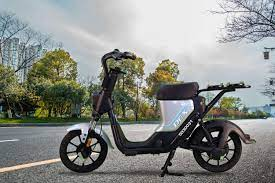                                           **[YULU CASE STUDY](https://www.yulu.bike/)**

## Introduction
**Yulu,** India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions.
However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market.

In [1]:
!gdown 1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i

Traceback (most recent call last):
  File "C:\Users\varun\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\varun\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\varun\anaconda3\Scripts\gdown.exe\__main__.py", line 7, in <module>
  File "C:\Users\varun\anaconda3\lib\site-packages\gdown\cli.py", line 156, in main
    filename = download(
  File "C:\Users\varun\anaconda3\lib\site-packages\gdown\download.py", line 259, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,chi2_contingency,f_oneway,kurtosis,skew,shapiro,levene,kruskal,mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

In [374]:
data=pd.read_csv('/content/bike_sharing.csv')

In [375]:
yulu_df=data.copy()

In [376]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [377]:
yulu_df.shape

(10886, 12)

In [378]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [379]:
yulu_df['datetime']=pd.to_datetime(yulu_df['datetime'])

In [380]:
yulu_df.rename(columns={'temp':"temperature",'atemp':'feeling_temperature'},inplace=True)

In [381]:
yulu_df['season']=yulu_df['season'].astype(object)
yulu_df['holiday']=yulu_df['holiday'].astype(object)
yulu_df['workingday']=yulu_df['workingday'].astype(object)
yulu_df['weather']=yulu_df['weather'].astype(object)

In [382]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             10886 non-null  datetime64[ns]
 1   season               10886 non-null  object        
 2   holiday              10886 non-null  object        
 3   workingday           10886 non-null  object        
 4   weather              10886 non-null  object        
 5   temperature          10886 non-null  float64       
 6   feeling_temperature  10886 non-null  float64       
 7   humidity             10886 non-null  int64         
 8   windspeed            10886 non-null  float64       
 9   casual               10886 non-null  int64         
 10  registered           10886 non-null  int64         
 11  count                10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [383]:
category_variable=['season','holiday','workingday','weather']
numerical_variable=['temperature','feeling_temperature','windspeed','casual','registered','count']

In [384]:
yulu_df.describe()

,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##Univariate Plot

###Numerical Variable Plotting

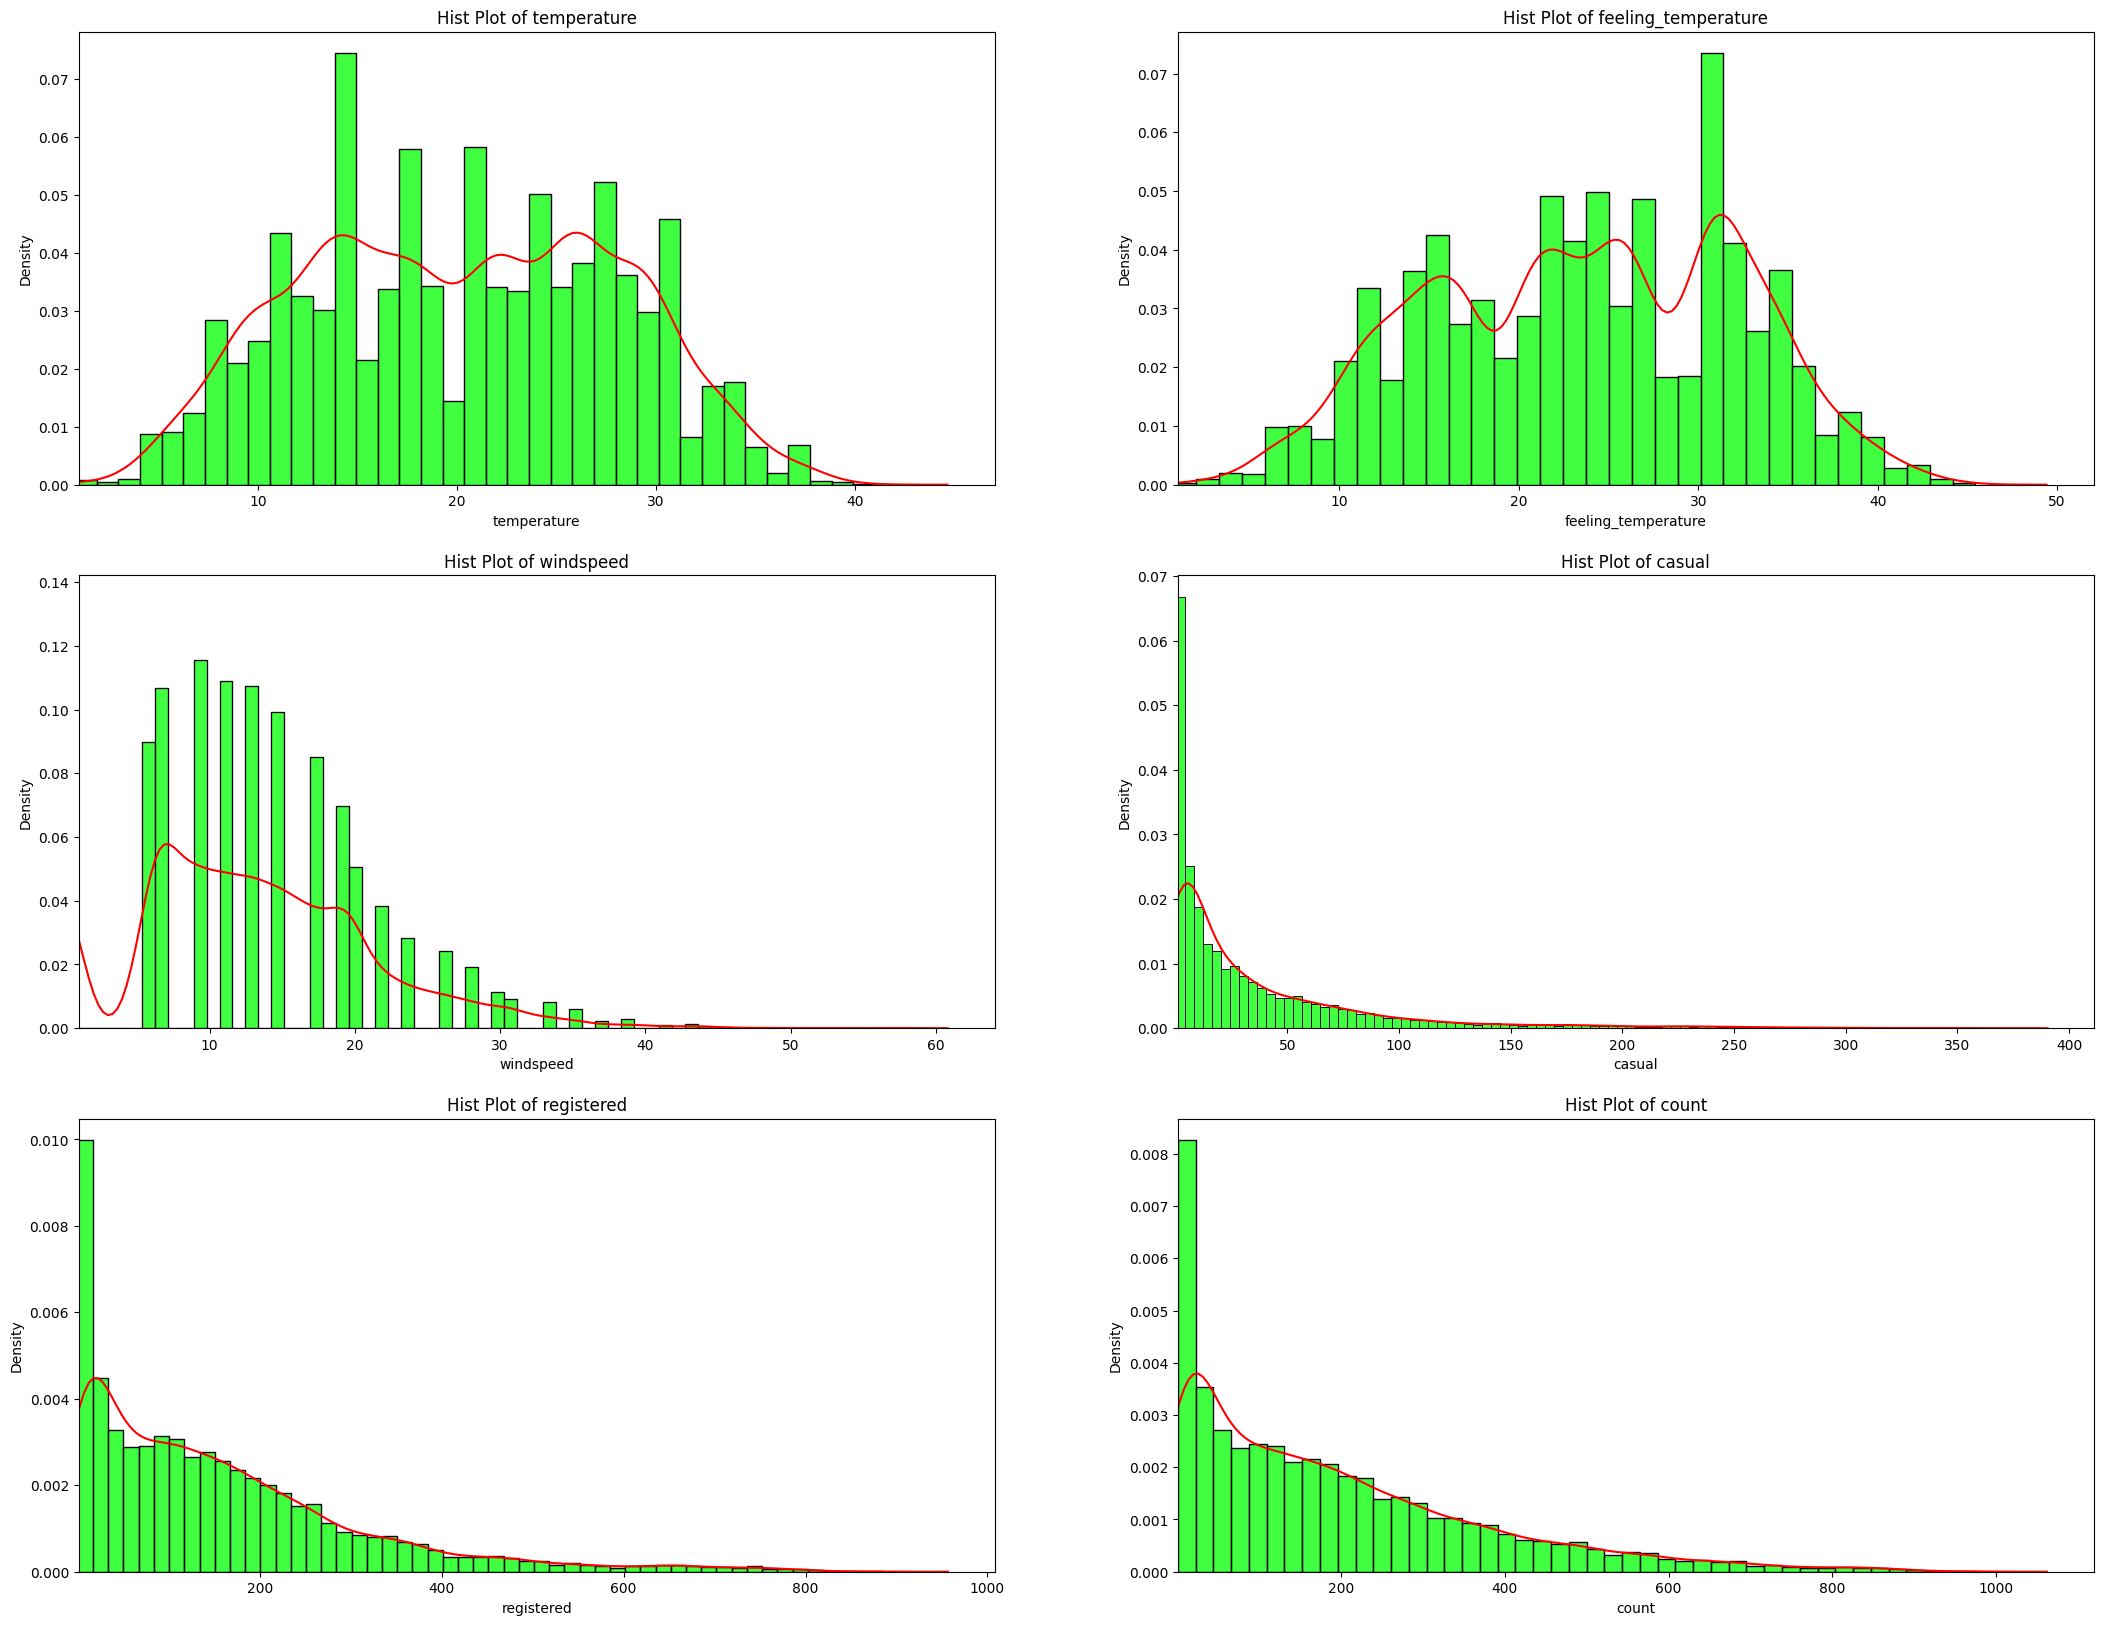

In [385]:
#histplot and kde plot for numerical variables
plt.figure(figsize=(26,20))


for i,j in enumerate(numerical_variable):
  plt.subplot(3,2,i+1)
  sns.histplot(yulu_df[j],color='lime',stat='density')
  sns.kdeplot(yulu_df[j],color='red')
  plt.xlim(left=1)
  plt.title(f'Hist Plot of {j}')
plt.show()


In [386]:
registered=yulu_df['registered'].sum()*100/yulu_df['count'].sum()
print('registered % ',registered.round(2))

registered %  81.2


### Category Plotting

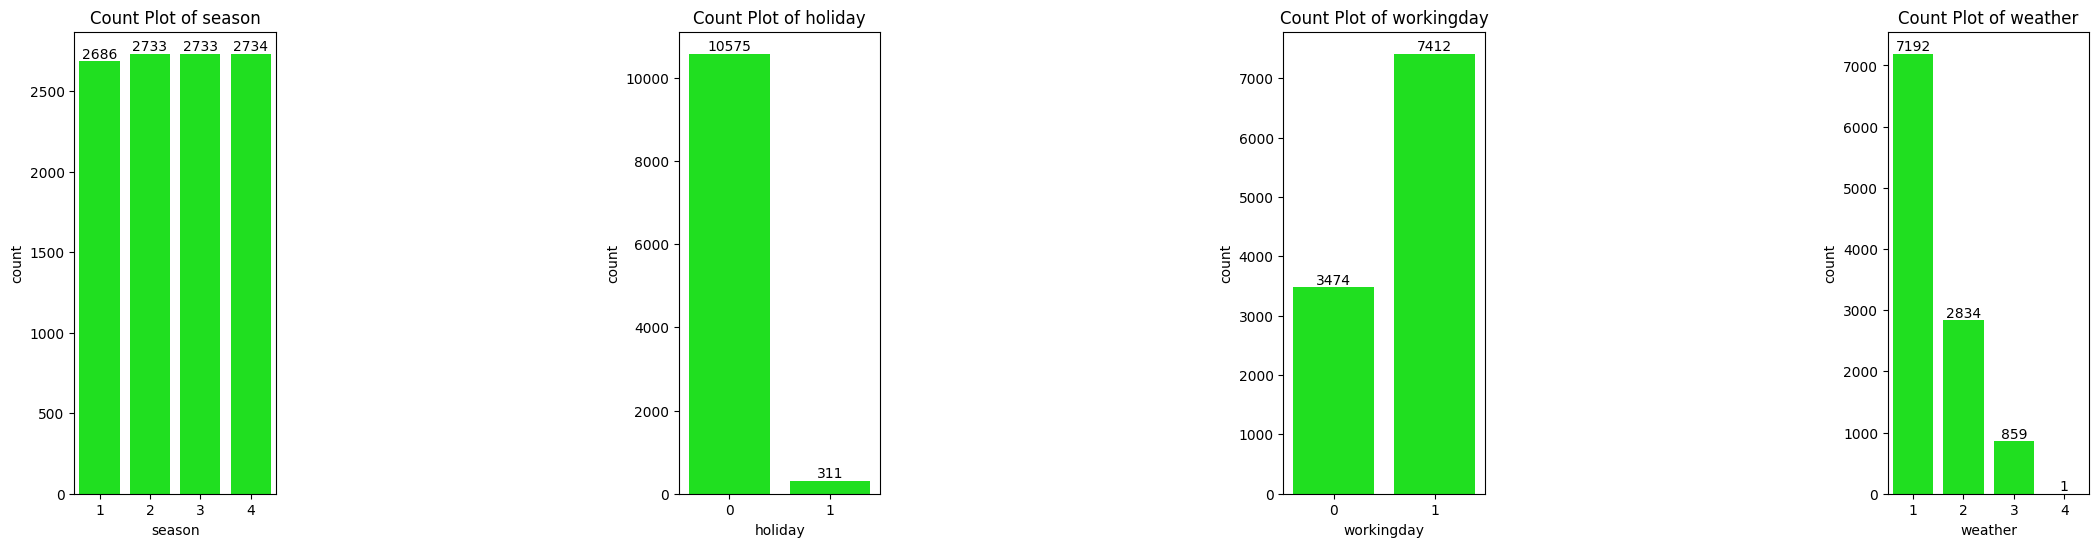

In [387]:
#countplot for categorical variables
plt.figure(figsize=(26,6))

plt.subplots_adjust(wspace=2)
for i,j in enumerate(category_variable):
  plt.subplot(1,4,i+1)
  ax=sns.countplot(data=yulu_df,x=j,color='lime')
  plt.title(f'Count Plot of {j}')
  for i in ax.containers:
    ax.bar_label(i)


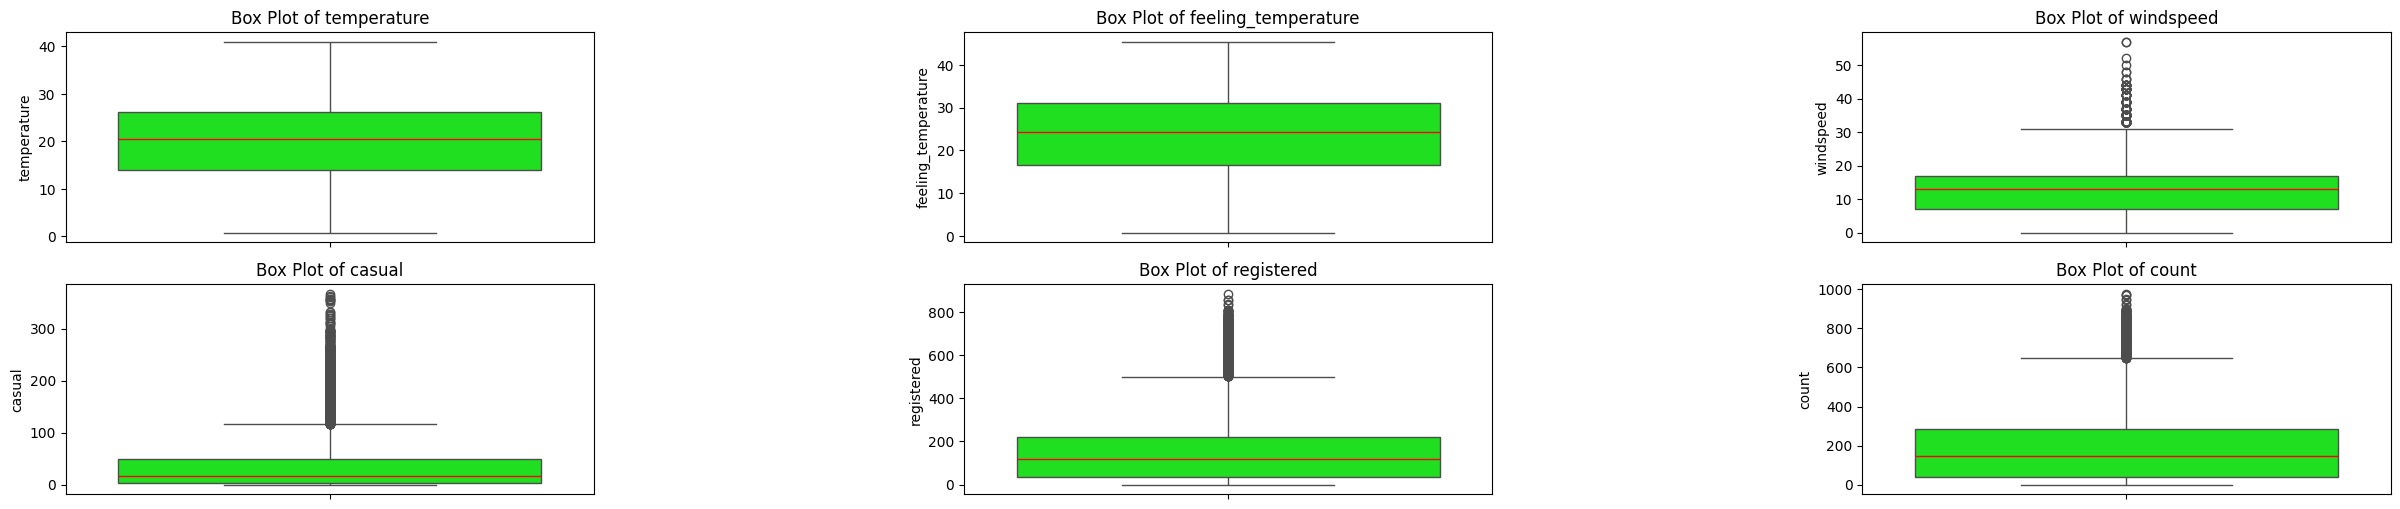

In [388]:
#box plot with outliers
plt.figure(figsize=(30,6))

plt.subplots_adjust(wspace=0.7)
for i,j in enumerate(numerical_variable):
  plt.subplot(2,3,i+1)
  sns.boxplot(yulu_df[j],color='lime',medianprops={'color':'red'})
  plt.title(f'Box Plot of {j}')
plt.show()


In [389]:
yulu_df_before_outlier=yulu_df.copy()
yulu_df_before_outlier.describe()

,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [390]:
numerical_variable_outlier=['windspeed','casual','registered','count']
def outlier(i):
  q3=yulu_df[i].quantile(0.75)
  q1=yulu_df[i].quantile(0.25)
  iqr=q3-q1
  upper=q3+(1.5*iqr)
  lower=q1-(1.5*iqr)
  return (iqr,upper)    #from the plot we can see there no outlier below



In [391]:
for i in numerical_variable_outlier:
    iqr,upper=outlier(i)
    print(f'----------------------------------{i}------------------------------------------------------------------------\n')
    print(f'Inter Quartile Range for {i} is : ',iqr.round(2))

    print(f'Upper limit of  {i} is : ',upper.round(2),'\n')

----------------------------------windspeed------------------------------------------------------------------------

Inter Quartile Range for windspeed is :  10.0
Upper limit of  windspeed is :  31.99 

----------------------------------casual------------------------------------------------------------------------

Inter Quartile Range for casual is :  45.0
Upper limit of  casual is :  116.5 

----------------------------------registered------------------------------------------------------------------------

Inter Quartile Range for registered is :  186.0
Upper limit of  registered is :  501.0 

----------------------------------count------------------------------------------------------------------------

Inter Quartile Range for count is :  242.0
Upper limit of  count is :  647.0 



In [392]:
for i in numerical_variable_outlier:
  iqr,upper=outlier(i)
  mean_before = yulu_df_before_outlier[i].mean()
  median_before = yulu_df_before_outlier[i].median()
  std_before = yulu_df_before_outlier[i].std()

  mean_after = yulu_df[yulu_df[i] < upper][i].mean()
  median_after = yulu_df[yulu_df[i] < upper][i].median()
  std_after = yulu_df[yulu_df[i] < upper][i].std()
  print(f'----------------------------------{i}----------------------------------------------\n')
  print(f'Mean of {i} before outlier removal: ', mean_before.round(3))
  print(f'Median of {i} before outlier removal: ', median_before.round(3))
  print(f'Standard deviation of {i} before outlier removal: ', std_before.round(3),'\n')
  print(f'Mean of {i} after outlier removal: ', mean_after.round(3))
  print(f'Median of {i} after outlier removal: ', median_after.round(3))
  print(f'Standard deviation of {i} after outlier removal: ', std_after.round(3),'\n')

----------------------------------windspeed----------------------------------------------

Mean of windspeed before outlier removal:  12.799
Median of windspeed before outlier removal:  12.998
Standard deviation of windspeed before outlier removal:  8.165 

Mean of windspeed after outlier removal:  12.293
Median of windspeed after outlier removal:  11.001
Standard deviation of windspeed after outlier removal:  7.441 

----------------------------------casual----------------------------------------------

Mean of casual before outlier removal:  36.022
Median of casual before outlier removal:  17.0
Standard deviation of casual before outlier removal:  49.96 

Mean of casual after outlier removal:  25.242
Median of casual after outlier removal:  14.0
Standard deviation of casual after outlier removal:  27.937 

----------------------------------registered----------------------------------------------

Mean of registered before outlier removal:  155.552
Median of registered before outlier 

Based on the analysis of the data, it is observed that the variable **windspeed** is not **significantly affected by outliers**. Therefore, it is reasonable to **include these outliers** in our analysis for **windspeed**.

However, for the variables **registered** and **casual**, the impact of outliers is **substantial**. These outliers could **potentially skew our analysis** and lead to **inaccurate results** . Hence, it is advisable to **remove these outliers** from our dataset for **registered** and **casual**.Same for **count** since it is a dependent variable

In [393]:
yulu_df = yulu_df[(yulu_df['casual'] <= 116.5) & (yulu_df['registered'] <= 501.0) & (yulu_df['count'] <= 647.0)]


In [394]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             9744 non-null   datetime64[ns]
 1   season               9744 non-null   object        
 2   holiday              9744 non-null   object        
 3   workingday           9744 non-null   object        
 4   weather              9744 non-null   object        
 5   temperature          9744 non-null   float64       
 6   feeling_temperature  9744 non-null   float64       
 7   humidity             9744 non-null   int64         
 8   windspeed            9744 non-null   float64       
 9   casual               9744 non-null   int64         
 10  registered           9744 non-null   int64         
 11  count                9744 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 989.6+ KB


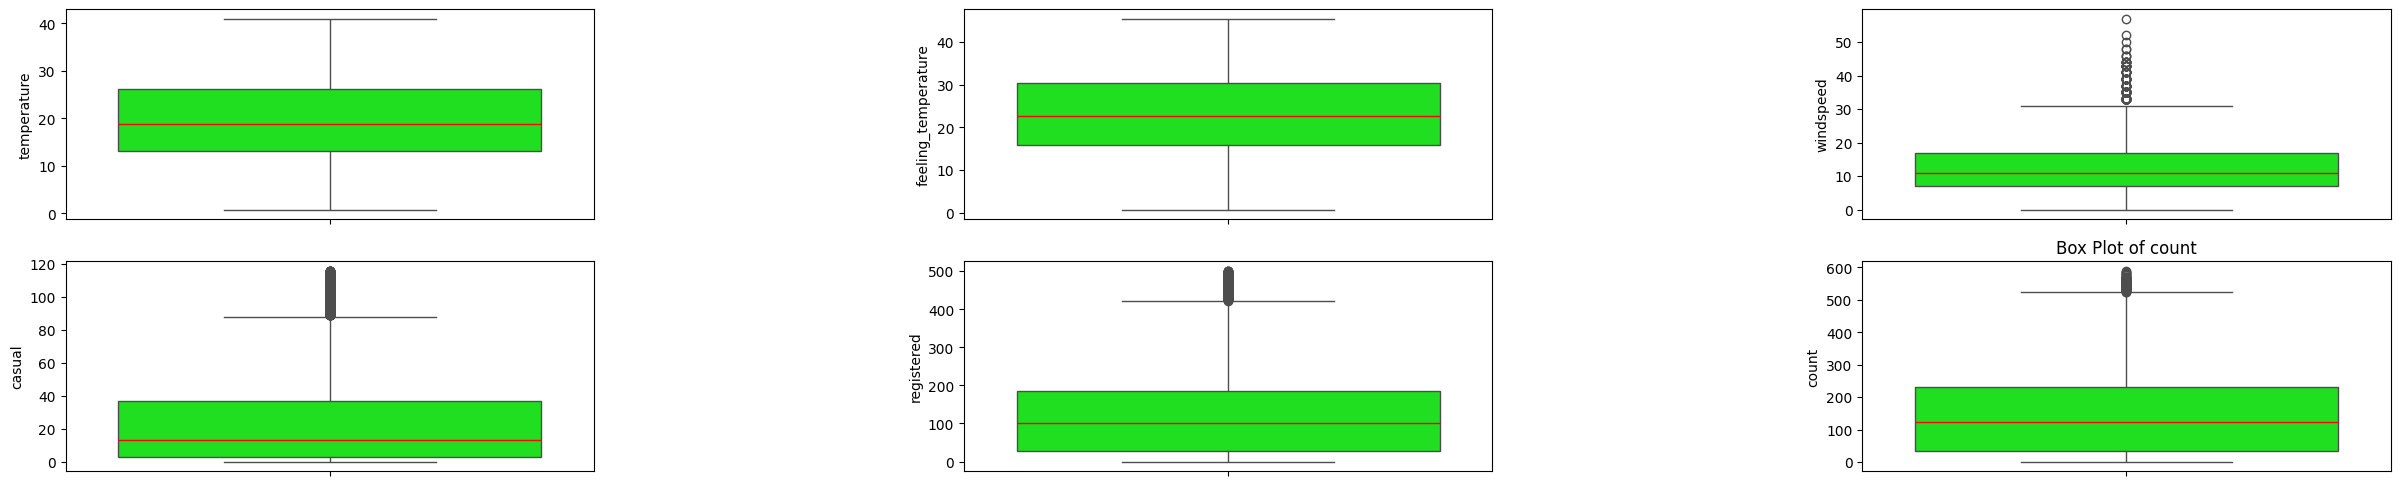

In [395]:
plt.figure(figsize=(30,6))

plt.subplots_adjust(wspace=0.7)
for i,j in enumerate(numerical_variable):
   plt.subplot(2,3,i+1)

   sns.boxplot(yulu_df[j],color='lime',medianprops={'color':'red'})
plt.title(f'Box Plot of {j}')
plt.show()


In [396]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             9744 non-null   datetime64[ns]
 1   season               9744 non-null   object        
 2   holiday              9744 non-null   object        
 3   workingday           9744 non-null   object        
 4   weather              9744 non-null   object        
 5   temperature          9744 non-null   float64       
 6   feeling_temperature  9744 non-null   float64       
 7   humidity             9744 non-null   int64         
 8   windspeed            9744 non-null   float64       
 9   casual               9744 non-null   int64         
 10  registered           9744 non-null   int64         
 11  count                9744 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 989.6+ KB


In [397]:
yulu_df.describe()

,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
count,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000
mean,19.537611,22.910694,63.238814,12.657522,23.933190,125.938321,149.871511
std,7.680152,8.382677,19.112445,8.174210,26.971114,113.858064,131.331606
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.120000,15.910000,49.000000,7.001500,3.000000,29.000000,34.000000
50%,18.860000,22.725000,64.000000,11.001400,13.000000,101.000000,122.000000
75%,26.240000,30.305000,79.000000,16.997900,37.000000,186.000000,230.000000
max,41.000000,45.455000,100.000000,56.996900,116.000000,501.000000,590.000000


In [398]:
yulu_df.groupby('season')[numerical_variable].sum().sort_values('count',ascending=False)

,temperature,feeling_temperature,windspeed,casual,registered,count
season,,,,,,
3,65449.94,74070.240,25667.6330,81299,327635,408934
4,40633.46,49042.325,28640.9255,50272,355049,405321
2,52388.16,61312.100,31074.4392,71198,306421,377619
1,31902.92,38817.135,37951.8954,30436,238038,268474


In [399]:
yulu_df.groupby('holiday')[numerical_variable].sum().sort_values('count',ascending=False)

,temperature,feeling_temperature,windspeed,casual,registered,count
holiday,,,,,,
0,185674.24,217768.26,119760.8183,226558,1198866,1425424
1,4700.24,5473.54,3574.0748,6647,28277,34924


In [400]:
yulu_df.groupby('workingday')[numerical_variable].sum().sort_values('count',ascending=False)

,temperature,feeling_temperature,windspeed,casual,registered,count
workingday,,,,,,
1,139943.66,163587.37,89029.0506,154890,969813,1124703
0,50430.82,59654.43,34305.8425,78315,257330,335645


In [401]:
yulu_df.groupby('weather')[numerical_variable].sum().sort_values('count',ascending=False)

,temperature,feeling_temperature,windspeed,casual,registered,count
weather,,,,,,
1,124711.34,146064.980,80169.9354,163646,830647,994293
2,49759.24,58663.740,31576.7516,58664,324033,382697
3,15895.70,18501.715,11582.2029,10889,72305,83194
4,8.20,11.365,6.0032,6,158,164


In [402]:
yulu_df['season'].value_counts(normalize=True)*100

1    26.683087
4    25.584975
2    24.076355
3    23.655583
Name: season, dtype: float64

In [403]:
yulu_df['weather'].value_counts(normalize=True)*100

1    64.798851
2    26.724138
3     8.466749
4     0.010263
Name: weather, dtype: float64

In [404]:
yulu_df['workingday'].value_counts(normalize=True)*100

1    71.408046
0    28.591954
Name: workingday, dtype: float64

In [405]:
yulu_df['holiday'].value_counts(normalize=True)*100

0    97.331691
1     2.668309
Name: holiday, dtype: float64

## Bivariate Analysis

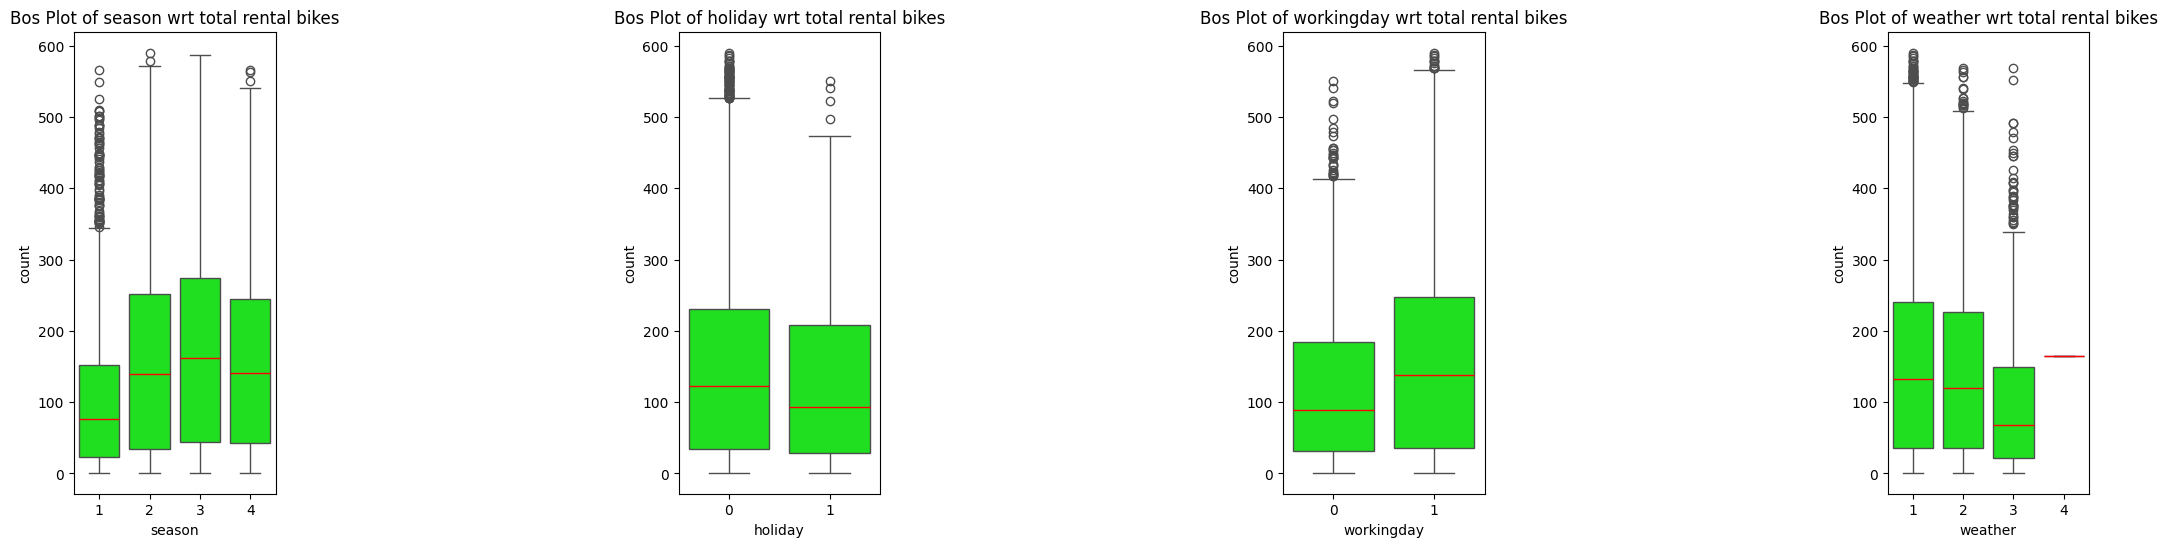

In [406]:
#box plot
plt.figure(figsize=(26,6))

plt.subplots_adjust(wspace=2)
for i,j in enumerate(category_variable):
  plt.subplot(1,4,i+1)
  sns.boxplot(data=yulu_df,x=j,y='count',color='lime',medianprops={'color':'red'})
  plt.title(f'Bos Plot of {j} wrt total rental bikes')




<ipython-input-407-10f174ea50ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yulu_df.corr())   #heatmap with independet and dependent variable count is the dependent variable


<Axes: >

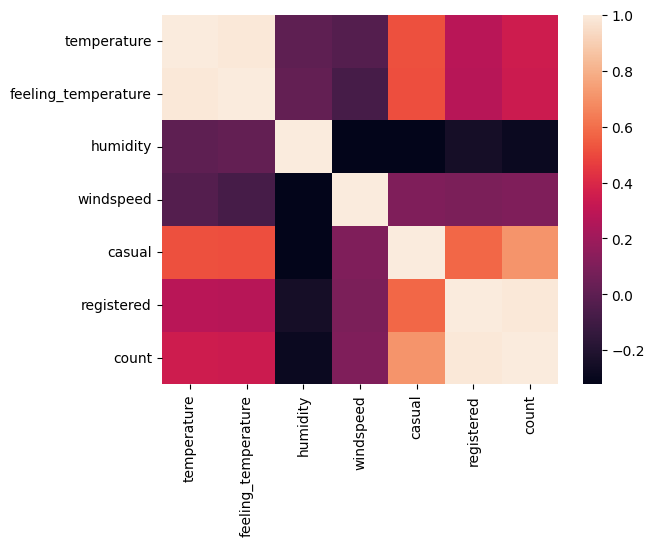

In [407]:
sns.heatmap(yulu_df.corr())   #heatmap with independet and dependent variable count is the dependent variable

Dependent variable is the count which dependent on the casual and registered users.From the heatmap we can see that humidity is negatively correalted to windspeed,casual,registered and count column.Holiday and Working are negatively correalted

## Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

 H0:No significance difference between no of bike rides on Weekdays and Weekends.

 H1::significance difference between no of bike rides on Weekdays and Weekends

Since ther is only 2 categorical values in workingday column we can use **2 sample independent T test** if normal else **Mann–Whitney U test**

In [408]:
weekday=yulu_df[yulu_df['workingday']==1]['count']

weekend=yulu_df[(yulu_df['workingday']==0) & (yulu_df['holiday']==0)]['count']


In [409]:

for val,i in enumerate([weekday,weekend]):

  stat,p_value=shapiro(np.random.choice(i, 100, replace=False))
  if p_value>0.05:
    print(f' Follows Normality with p_value {p_value}')
  else:
    print(f'follows Non normal distribution with p_value {p_value}')

follows Non normal distribution with p_value 1.099622568290215e-05
follows Non normal distribution with p_value 6.87701758579351e-05


In [410]:

stat,p_value=mannwhitneyu(weekday.values,weekend.values)

In [411]:
if(p_value>0.05):
  print(f'{p_value} and since p_value is grater ,Failed to Reject H0 there is no significance difference between weekday and weekend')
else:
  print(f'{p_value} and  since p_value is smaller , Reject H0 there is  significance difference between weekday and weekend')

2.6332053765765447e-27 and  since p_value is smaller , Reject H0 there is  significance difference between weekday and weekend


##Check if the demand of bicycles on rent is the same for different Weather conditions?

**Null Hypothesis (H0):** There is no significant difference in the demand for bicycles on rent during different weather conditions.

**Alternative Hypothesis (Ha):** There is a significant difference in the demand for bicycles on rent during different weather conditions.

There are 4 unique categories forweather column,so the test that can be done here is 1 way anova or kruskal

In [412]:
weather1=yulu_df[yulu_df['weather']==1]['count']
weather2=yulu_df[yulu_df['weather']==2]['count']
weather3=yulu_df[yulu_df['weather']==3]['count']
weather=[weather1,weather2,weather3]

Before doing annova we need tocheck 2 assumptions

#### 1) Check for Norrmality

<Figure size 600x400 with 0 Axes>

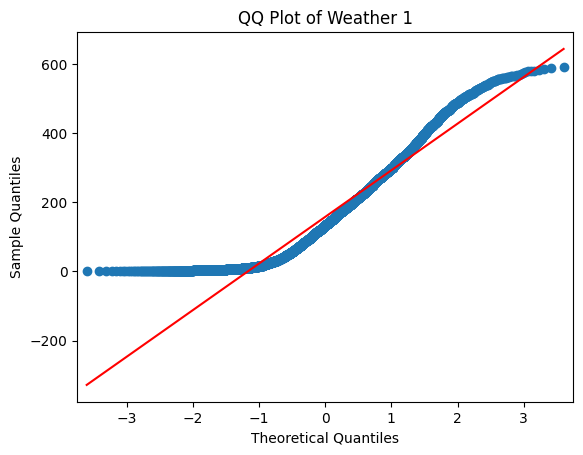

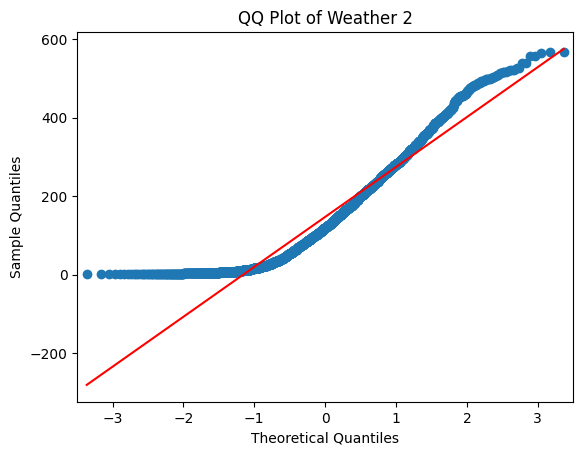

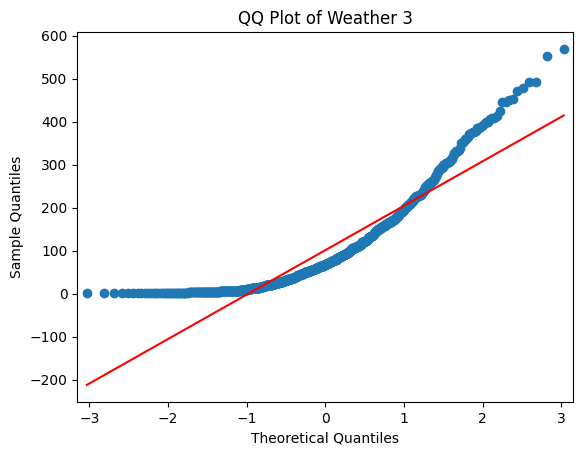

In [413]:
#QQPlot
plt.figure(figsize=(6, 4))
for i, w in enumerate(weather, 1):

    qqplot(w,line='s')
    plt.title(f'QQ Plot of Weather {i}')
    plt.show()


From the qqplot we can see that the it doesn't follow noramlity,it is skewed

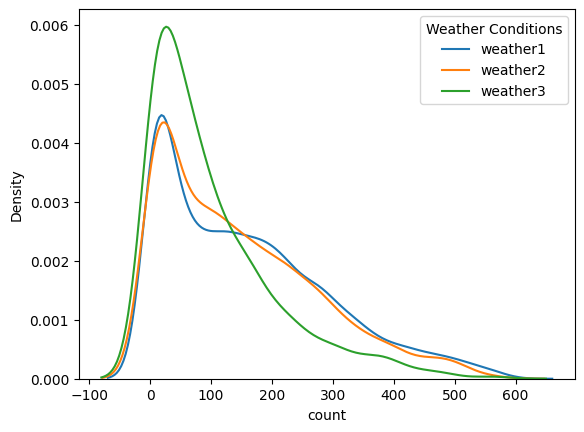

In [414]:
#KDe plot
labels = ['weather1', 'weather2', 'weather3']
for i,label in zip(weather,labels):
  sns.kdeplot(i,label=label)
plt.legend(title='Weather Conditions')
plt.show()

We can see a right skewed  distribution here

In [415]:
#Kurtosis
kurtosis(weather1,fisher=True),kurtosis(weather2,fisher=True),kurtosis(weather3,fisher=True)

(-0.006289566615964137, 0.08823399542811527, 2.2165232167518116)

In [416]:
#Skewness
skew(weather1, bias=False),skew(weather2, bias=False),skew(weather3, bias=False)


(0.8299214718809242, 0.8774354159440301, 1.5205417494901299)

In [417]:
#shapiro test


for val,i in enumerate(weather):

  stat,p_value=shapiro(np.random.choice(i, 100, replace=False))
  if p_value>0.05:
    print(f'Weather {val+1} Follows Normality with p_value {p_value}')
  else:
    print(f'Weather {val+1} follows Non normal distribution with p_value {p_value}')

Weather 1 follows Non normal distribution with p_value 1.1392638043616898e-05
Weather 2 follows Non normal distribution with p_value 6.419376859412296e-06
Weather 3 follows Non normal distribution with p_value 9.510286957947756e-08


Weather 4 nly has 1 value .I t can be seen that the weather is not a standard normal distribution it is rightly skewed

#### 1) Check for Variance

In [418]:
#levene test
stat,p_value=levene(weather1.values,weather2.values,weather3.values)
if p_value>0.05:
  print(f'Equal Variance across the Weather Group with f_stat:{stat} and p_value:{p_value}')
else:
  print(f'Not equal variance across Weather group with f_stat:{stat} and p_value:{p_value}')

Not equal variance across Weather group with f_stat:66.16644031282516 and p_value:2.869057401403539e-29


###3) Final Test

In [419]:
#1 way anova
stat,p_value=f_oneway(weather1.values,weather2.values,weather3.values)
if p_value>0.05:
  print(f'No significant difference between weather group with f_stat:{stat} and p_value:{p_value}')
else:
  print(f'Significant difference between weather group with f_stat:{stat} and p_value:{p_value}')

Significant difference between weather group with f_stat:69.67227178039973 and p_value:9.038955310845565e-31


In [420]:
#Kruskal
stat,p_value=kruskal(weather1.values,weather2.values,weather3.values)
if p_value>0.05:
  print(f'No significant difference between weather group with f_stat:{stat} and p_value:{p_value}')
else:
  print(f'Significant difference between weather group with f_stat:{stat} and p_value:{p_value}')

Significant difference between weather group with f_stat:133.31258709301804 and p_value:1.1260029508003794e-29




*   **Shapiro-Wilk Test,QQPlot,Skewness** and **Kurosis** proved that the data is** not normally distributed(Right Skewed)**
*   **Levene** test **fails** showing **non equivarience** between the weather group


*   **Anova** and **Kruskal** test failing says that there is **significant difference in count between 4 weather**







## Check if the demand of bicycles on rent is the same for different Weather conditions?

**Null Hypothesis (H0):** There is no significant difference in the demand for bicycles on rent during different weather conditions.

**Alternative Hypothesis (Ha):** There is a significant difference in the demand for bicycles on rent during different weather conditions.

There are 4 unique categories forweather column,so the test that can be done here is 1 way anova or kruskal

In [421]:
season1=yulu_df[yulu_df['season']==1]['count']
season2=yulu_df[yulu_df['season']==2]['count']
season3=yulu_df[yulu_df['season']==3]['count']
season4=yulu_df[yulu_df['season']==4]['count']
season=[season1,season2,season3,season4]

Before doing annova we need tocheck 2 assumptions

#### 1) Check for Norrmality

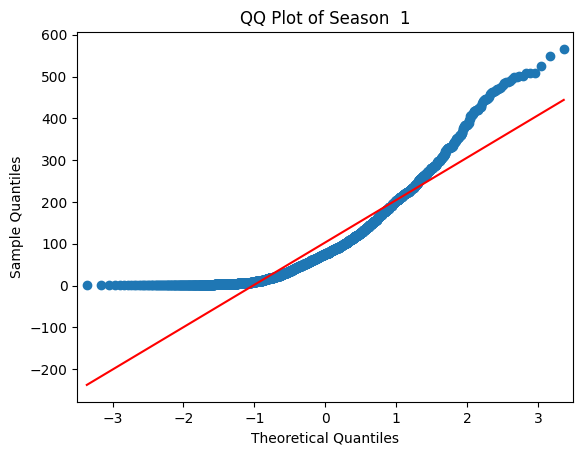

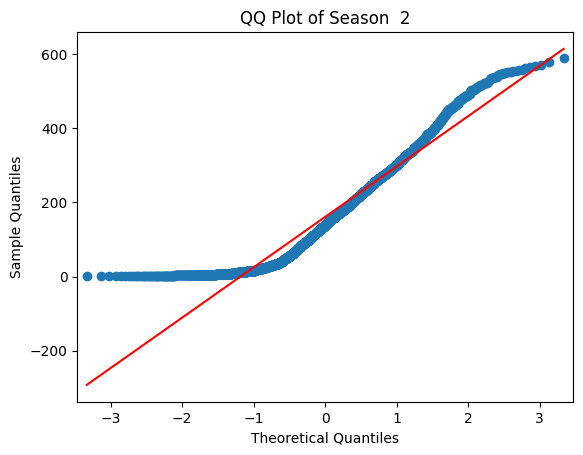

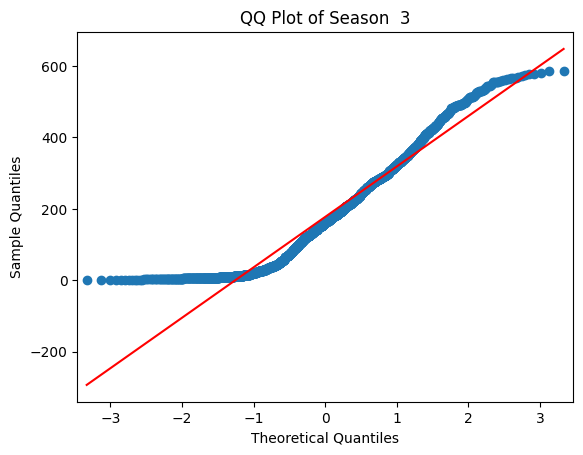

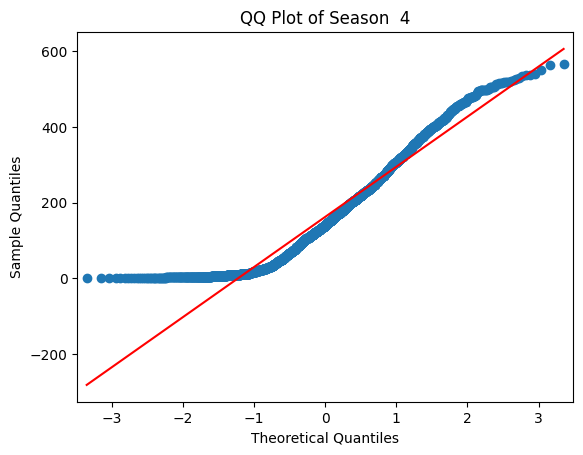

In [422]:
#QQ Plot


for i, w in enumerate(season, 1):
    qqplot(w,line='s')
    plt.title(f'QQ Plot of Season  {i}')
    plt.show()


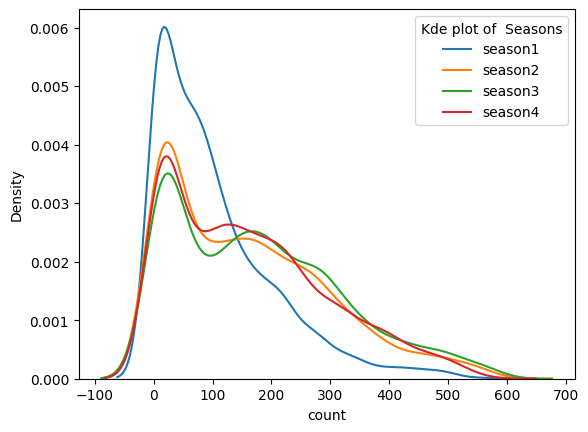

In [423]:
# normal KDE Plot

labels = ['season1', 'season2', 'season3', 'season4']
for i,label in zip(season,labels):
  sns.kdeplot(i,label=label)
plt.legend(title='Kde plot of  Seasons')
plt.show()

In [424]:
#kurtosis

kurtosis(season1,fisher=True),kurtosis(season2,fisher=True),kurtosis(season3,fisher=True),kurtosis(season4,fisher=True)

(2.0758488632442402,
 -0.10814392360503389,
 -0.29979648107837065,
 -0.31100897523632653)

In [425]:
#skewness

skew(season1, bias=False),skew(season2, bias=False),skew(season3, bias=False),skew(season4, bias=False)

(1.4292786229850654,
 0.7755053497673621,
 0.6606743371612339,
 0.6989827476042567)

In [426]:
#shapiro Willis Test

for val,i in enumerate(season):

  stat,p_value=shapiro(np.random.choice(i, 100, replace=False))
  if p_value>0.05:
    print(f'Season {val+1} Follows Normality with p_value {p_value}')
  else:
    print(f'Season {val+1} follows Non normal distribution with p_value {p_value}')

Season 1 follows Non normal distribution with p_value 4.039297715752177e-11
Season 2 follows Non normal distribution with p_value 1.3080325800274295e-07
Season 3 follows Non normal distribution with p_value 9.986547956941649e-05
Season 4 follows Non normal distribution with p_value 0.0003218793135602027


#### 2) Check for Variance

In [427]:
#levene test

stat,p_value=levene(season1.values,season2.values,season3.values,season4.values)
if p_value>0.05:
  print(f'Equal Variance across the Season Group with f_stat:{stat} and p_value:{p_value}')
else:
  print(f'Not equal variance across Seasongroup with f_stat:{stat} and p_value:{p_value}')

Not equal variance across Seasongroup with f_stat:142.5971107684539 and p_value:1.9848332725717858e-90


###3) Final Test

In [428]:
#1 way anova

stat,p_value=f_oneway(season1.values,season2.values,season3.values,season4.values)
if p_value>0.05:
  print(f' There is no significant difference in the demand for bicycles on rent during different weather conditions with f_stat:{stat} and p_value:{p_value}')
else:
  print(f'There is a significant difference in the demand for bicycles on rent during different weather conditions. with f_stat:{stat} and p_value:{p_value}')

There is a significant difference in the demand for bicycles on rent during different weather conditions. with f_stat:164.1770085863188 and p_value:7.996972694386891e-104


In [429]:
 #Kruskal
stat,p_value=kruskal(season1.values,season2.values,season3.values,season4.values)
if p_value>0.05:
  print(f' There is no significant difference in the demand for bicycles on rent during different weather conditions with f_stat:{stat} and p_value:{p_value}')
else:
  print(f'There is a significant difference in the demand for bicycles on rent during different weather conditions. with f_stat:{stat} and p_value:{p_value}')

There is a significant difference in the demand for bicycles on rent during different weather conditions. with f_stat:451.1790765874807 and p_value:1.8104322519418493e-97


*   **Shapiro-Wilk Test,QQPlot,Skewness** and **Kurosis** proved that the data is** not normally distributed(Right Skewed)**
*   **Levene** test **fails** showing **non equivarience** between the Season group

*   Cannot use **Annova** since the both **levene** and **shapiro** is failing

*   **Kruskal** test failing says that there is **significant difference in count between 4 Season Group**

## Check if the Weather conditions are significantly different during different Seasons?

**Null Hypothesis (H0):** There is no significant difference in weather conditions between different seasons.

**Alternative Hypothesis (Ha):** There is a significant difference in weather conditions between different seasons.

In [430]:
weather_season_contingency_table=pd.crosstab(yulu_df['weather'],yulu_df['season'],margins=True)   # creating contingency table

In [431]:
weather_season_contingency_table

season,1,2,3,4,All
weather,,,,,
1,1689,1506,1602,1517,6314
2,700,625,521,758,2604
3,210,215,182,218,825
4,1,0,0,0,1
All,2600,2346,2305,2493,9744


In [432]:
#Chi square test for independence
chi_stat,p_value,dof,expected=chi2_contingency(weather_season_contingency_table)
if p_value>0.05:
  print(f'There is no significant difference in weather conditions between different seasons.with p_value:{p_value}')
else:
  print(f'There is a significant difference in weather conditions between different seasons. with  p_value:{p_value}')


There is a significant difference in weather conditions between different seasons. with  p_value:6.768128486039661e-05


##Inference


*  Most rentals happen during Spring(Season 1)
*   Registered users are more compared to casual users **(more than 80%)**

*   Its observed that whenever there is Clear, Few clouds, partly cloudy(Weather 1)  the bike rental is more in comparison to other weather conditions.64 % of rentals happened during Clear, Few clouds, partly cloudy weather.
*   Based on the results of our hypothesis testing, we found evidence to suggest that both weather conditions and seasons have a significant impact on bicycle rental demand.





### Recommendations



*  ** Seasonal Demand:** We observed a higher demand for bicycle rentals during certain seasons. To meet this increased demand, it would be beneficial for the company to ensure a sufficient stock of bicycles during these peak seasons. Conversely, during off-peak seasons, the company could reduce the stock of bicycles and allocate resources to other areas, such as maintenance and customer service.



1.   **Spring Strategy:** As the data indicates a higher number of transactions in spring, we recommend implementing a loyalty program or offering discounts for frequent rentals. This could incentivize customers to engage in more transactions, thereby increasing our spring revenue.
2.   **Winter Strategy:** Despite the cold weather, the number of rides is higher in winter. To capitalize on this trend, we suggest offering incentives for longer rentals or introducing packages for extended use. This could motivate users to rent bicycles for longer periods, thereby increasing the total usage during the winter season.

*  **Registered Users:** Data shows that registered users contribute significantly to the total demand. This is a positive indication of customer loyalty and satisfaction with the service provided by the company. To maintain this high level of demand, especially during peak seasons, the company should continue to focus on providing excellent service to its registered users.


* ** Weather Conditions:** The demand for bicycle rentals is highest during clear sky conditions. During other weather conditions, the company could schedule maintenance activities for the bicycles. This approach aligns with the Pareto principle (also known as the 80/20 rule), which suggests that 80% of effects come from 20% of causes. In this case, a significant portion of the demand comes from a small number of favorable weather conditions.




